In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("D:/DOWNLOADS/air force.csv")
df.head(5)

,Aircraft,Origin,Type,Variant,In service,Duty
0,Dassault Rafale,France,Multirole,EH/DH,36.0,Combat Aircraft
1,Sukhoi Su-30,Russia,Multirole,Su-30MKI,262.0,Combat Aircraft
2,HAL Tejas,India,Multirole,Mk.1,32.0,Combat Aircraft
3,HAL Tejas,India,Multirole,Mk.1A,0.0,Combat Aircraft
4,MiG-29,Russia,Multirole,MiG-29UPG,65.0,Combat Aircraft


In [4]:
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aircraft    85 non-null     object 
 1   Origin      85 non-null     object 
 2   Type        85 non-null     object 
 3   Variant     60 non-null     object 
 4   In service  80 non-null     float64
 5   Duty        84 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.1+ KB
None


       In service
count   80.000000
mean    32.862500
std     48.350708
min      0.000000
25%      4.000000
50%     15.000000
75%     37.500000
max    262.000000


### || Largest to Lowest number of aircrafts by Origin ||

In [5]:
supplier=df.groupby(["Origin"])["In service"].sum().sort_values(ascending=False)
supplier


Origin
India             802.0
Russia            750.0
United Kingdom    365.0
Israel            126.0
Germany           117.0
Ukraine           103.0
United States     101.0
France             99.0
Slovenia           84.0
Switzerland        75.0
Brazil              7.0
Spain               0.0
Name: In service, dtype: float64

###  || Composition of India's Air Force Power based on Aircraft Origin ||

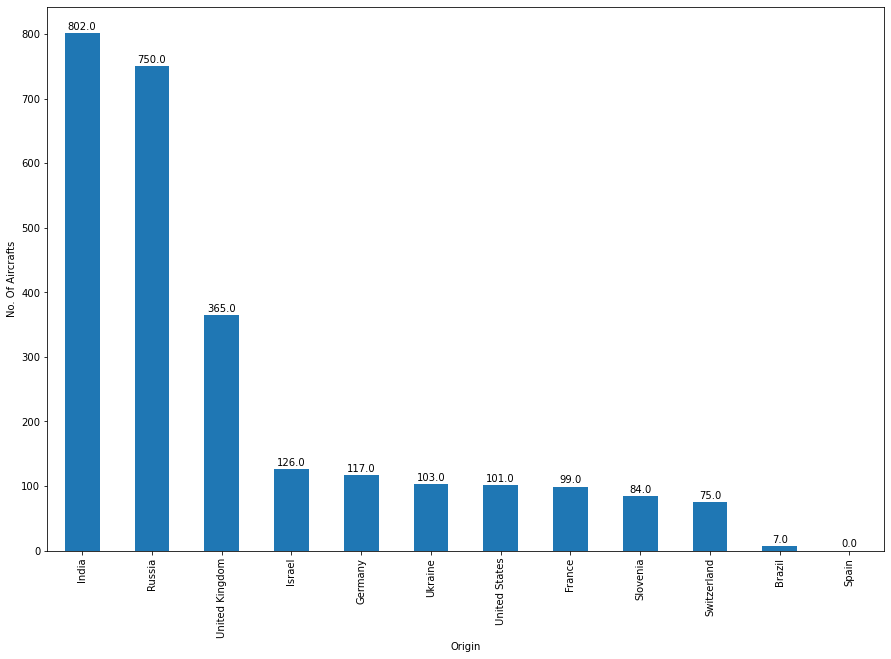

In [6]:
plt.figure(figsize=(15,10))
Or2 = (df.groupby(["Origin"])["In service"].sum().sort_values(ascending=False))
Or2.plot(kind="bar")
plt.ylabel("No. Of Aircrafts")

for i in range(0,len(Or2)):
    plt.text(i,10+Or2[i],Or2[i],ha="center",va="center")




###  || Total aircrafts of each type supplied by each country ||

In [7]:
df.groupby(["Origin","Duty"])["In service"].sum()

Origin          Duty              
Brazil          AWACS                   3.0
                Transport               4.0
France          Combat Aircraft        87.0
                Trainer Aircraft       12.0
Germany         Maritime patrol        64.0
                Transport              53.0
India           Combat Aircraft        32.0
                Helicopters           582.0
                Trainer Aircraft       98.0
                UAV                    54.0
Israel          Reconnaissance          2.0
                UAV                   124.0
Russia          AWACS                  17.0
                Combat Aircraft       416.0
                Helicopters           238.0
                Maritime patrol         4.0
                Tanker                  6.0
                Trainer Aircraft       52.0
                Transport              17.0
Slovenia        Trainer Aircraft       84.0
Spain           Transport               0.0
Switzerland     Trainer Aircraft       75

###  How many number of Aircraft of Each Type is in Service?

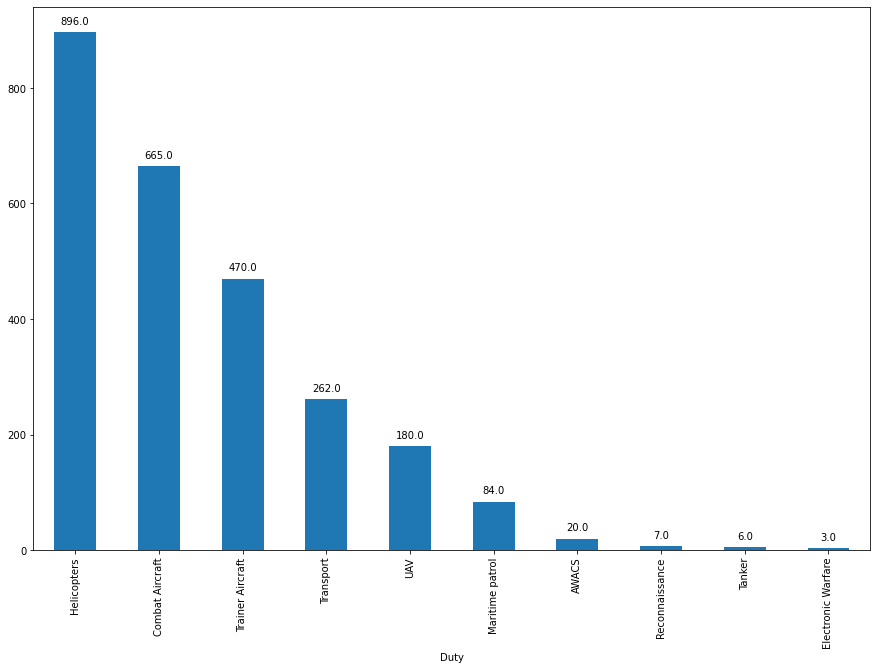

In [8]:
plt.figure(figsize=(15,10))
type_1=(df.groupby("Duty")["In service"].sum()).sort_values(ascending=False)
type_1.plot(kind="bar")

for i in range(0,len(type_1)):
    plt.text(i,10+type_1[i],type_1[i],ha="center",va="bottom")

### Who are the top supplier of aircraft for each duty type in terms of volume?

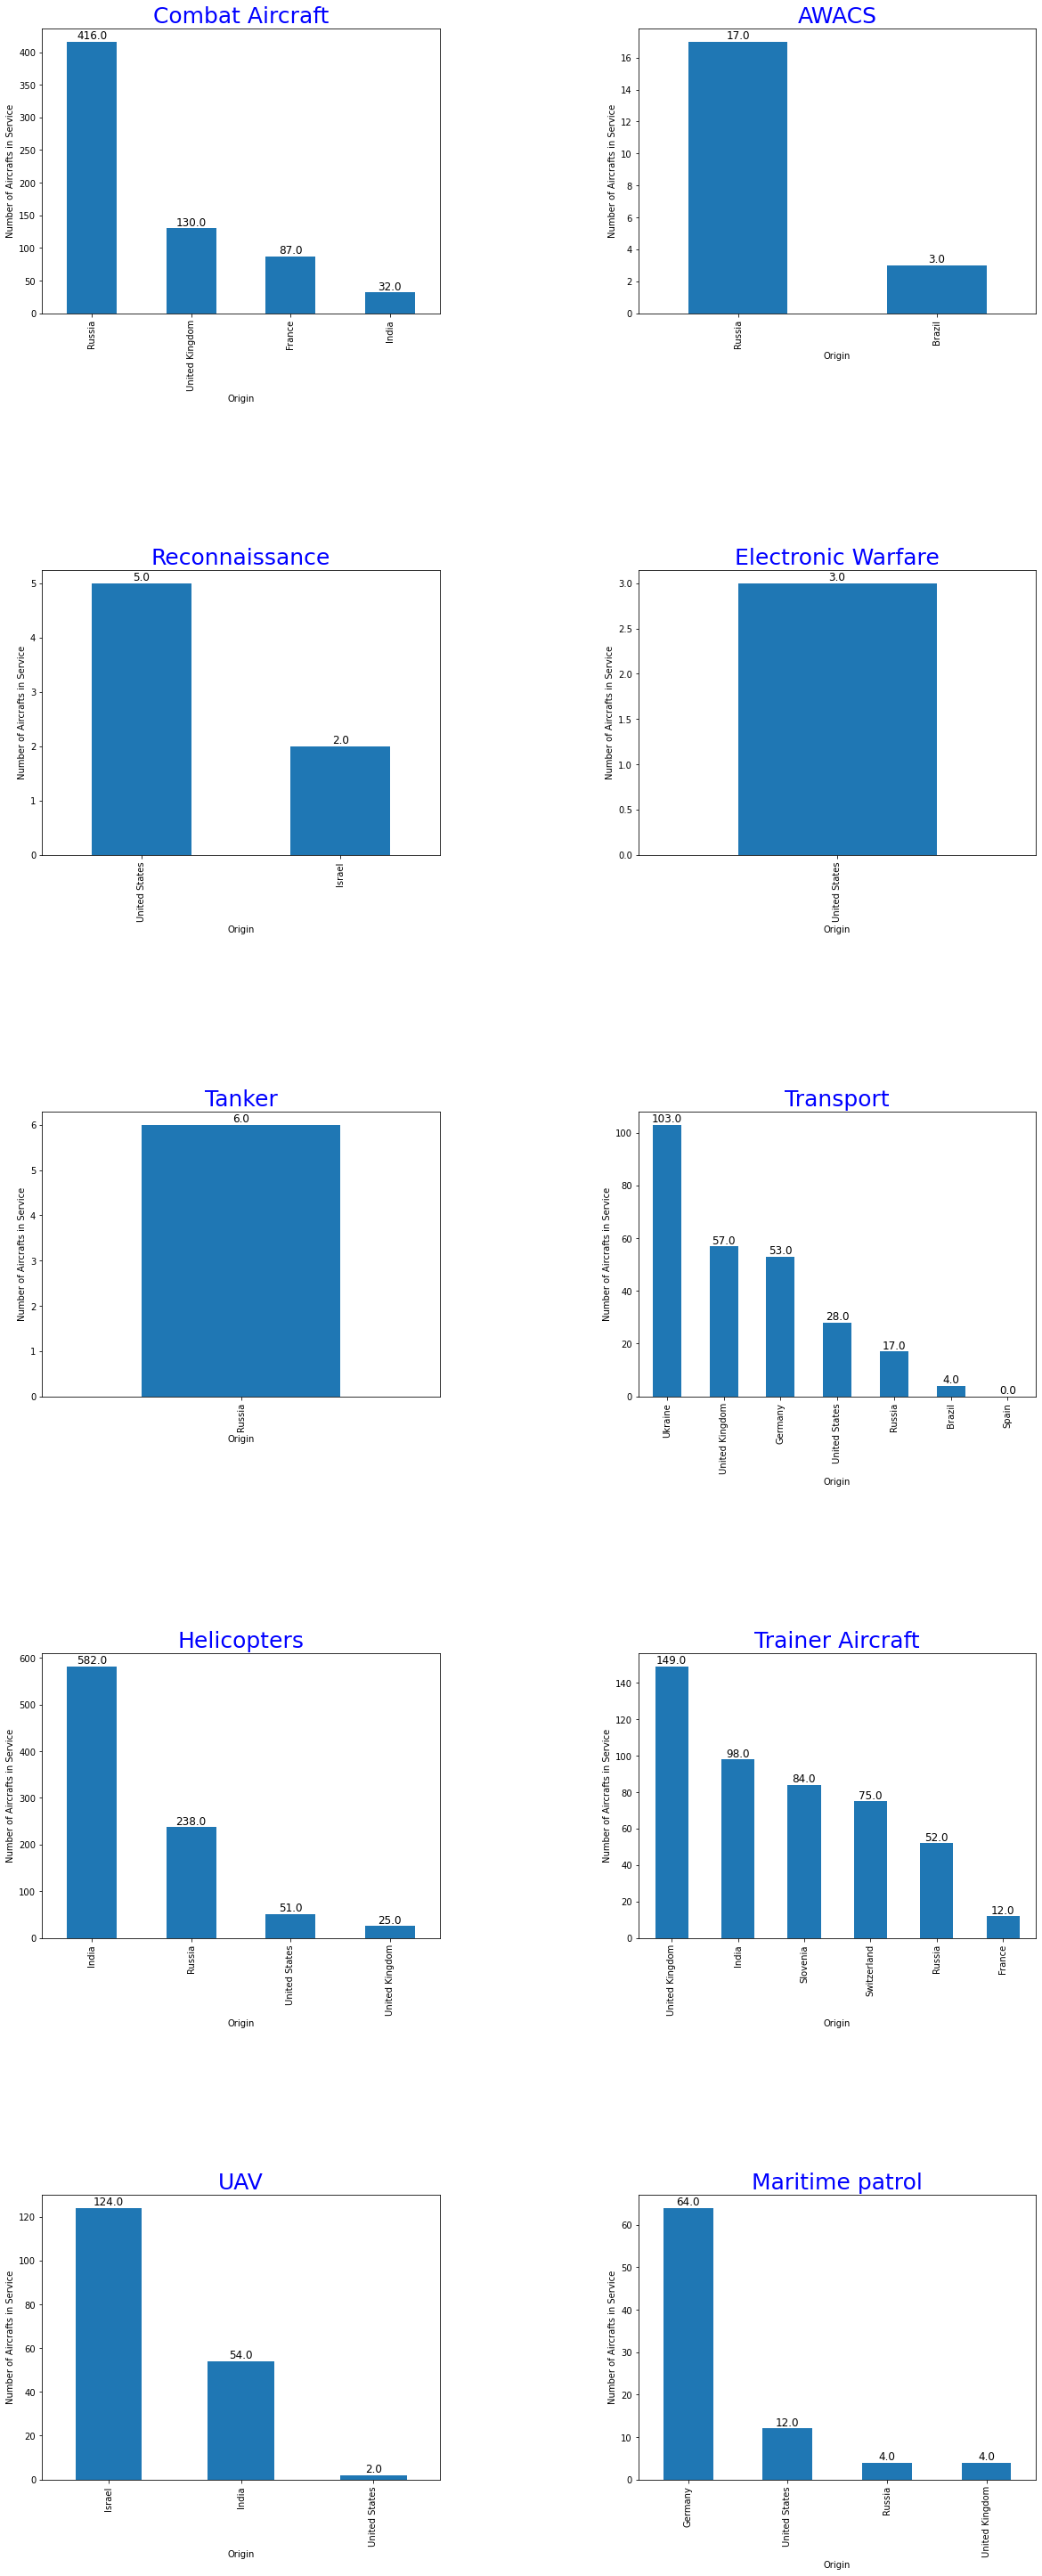

In [9]:
duty_list=df["Duty"].unique()

plt.figure(figsize=(20,60))
for i in range(0,10):
    plt.subplot(9,2,i+1) 
    plt.subplots_adjust(top = 1.2, bottom=0, hspace=0.9, wspace=0.5)
    table = df[df["Duty"]==duty_list[i]]
    z1 = table.groupby("Origin")["In service"].sum().sort_values(ascending=False)
    z1.plot(kind="bar")
    plt.title(duty_list[i],fontsize=25,color="blue")
    plt.ylabel("Number of Aircrafts in Service")
    for x in range(0,len(z1)):
        plt.text(x,z1[x],z1[x],ha="center",va="bottom",size=12)
    

###  <center>Tracking down each country's portfolio in India's air power in terms of volume?<center>

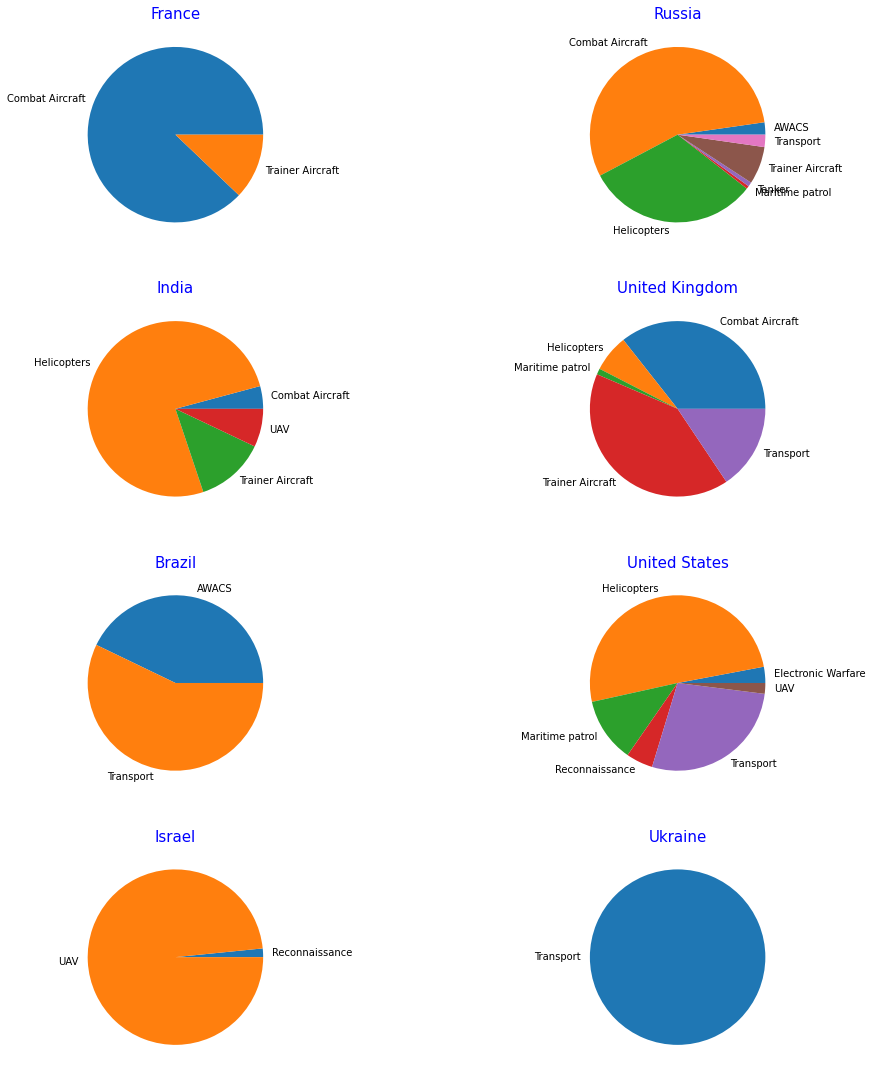

In [10]:
Origin_list=df["Origin"].unique()

plt.figure(figsize=(18,30))
for i in range(0,8):
    plt.subplot(8,2,i+1) 
    plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.25, wspace=0)
    table2 = df[df["Origin"]==Origin_list[i]]
    table2.groupby("Duty")["In service"].sum().plot(kind="pie")
    plt.title(Origin_list[i],fontsize=15,color="blue")
    plt.ylabel(" ")
    
    

### What is India's Air Power composition in terms of Rotary Wing and Fixed Wing Aircraft in terms of volume?

C:\Users\HP\AppData\Local\Temp\ipykernel_14360\1461908903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wing_Type"][i]="Fixed Wing"


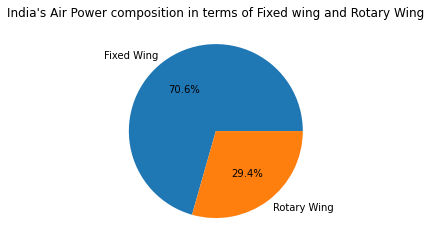

In [19]:
df["Wing_Type"] = np.zeros(len(df["Duty"]))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

for i in range (0,len(df["Duty"])):
    if df["Duty"][i]=="Helicopters":
        df["Wing_Type"][i]="Rotary Wing"
    elif df["Aircraft"][i]=="HAL Chetak":
        df["Wing_Type"][i]="Rotary Wing"
    else:
        df["Wing_Type"][i]="Fixed Wing"
        
df["Wing_Type"].value_counts().plot(kind="pie",autopct='%.1f%%');
plt.ylabel(" ");
plt.title("India's Air Power composition in terms of Fixed wing and Rotary Wing");

### Prepare a list of each aircraft with its respective variant and its number in service

In [12]:
df.groupby(["Aircraft","Variant"])["In service"].sum()


Aircraft                     Variant              
Antonov An-32                An-32/32RE               103.0
BAE Hawk                     Hawk 132                 119.0
Beriev A-50                  A-50EI                     3.0
Boeing 737                   737–700                    3.0
Boeing 777                   777-300ER                  2.0
Boeing AH-64 Apache          AH-64E                    22.0
                             AH-64E(I)                  6.0
Boeing P-8                   P-8I                      12.0
Britten-Norman BN-2          BN-2B/2T                   4.0
C-130J Super Hercules        C-130J-30                 12.0
CH-47 Chinook                CH-47F                    15.0
Dassault Rafale              EH/DH                     36.0
Dornier 228                  228–201                   53.0
Dornier Do 228               101/201                   36.0
                             228-201                   28.0
EADS CASA C-295              C-295MW             

### Variety of aircrafts in each Duty type category

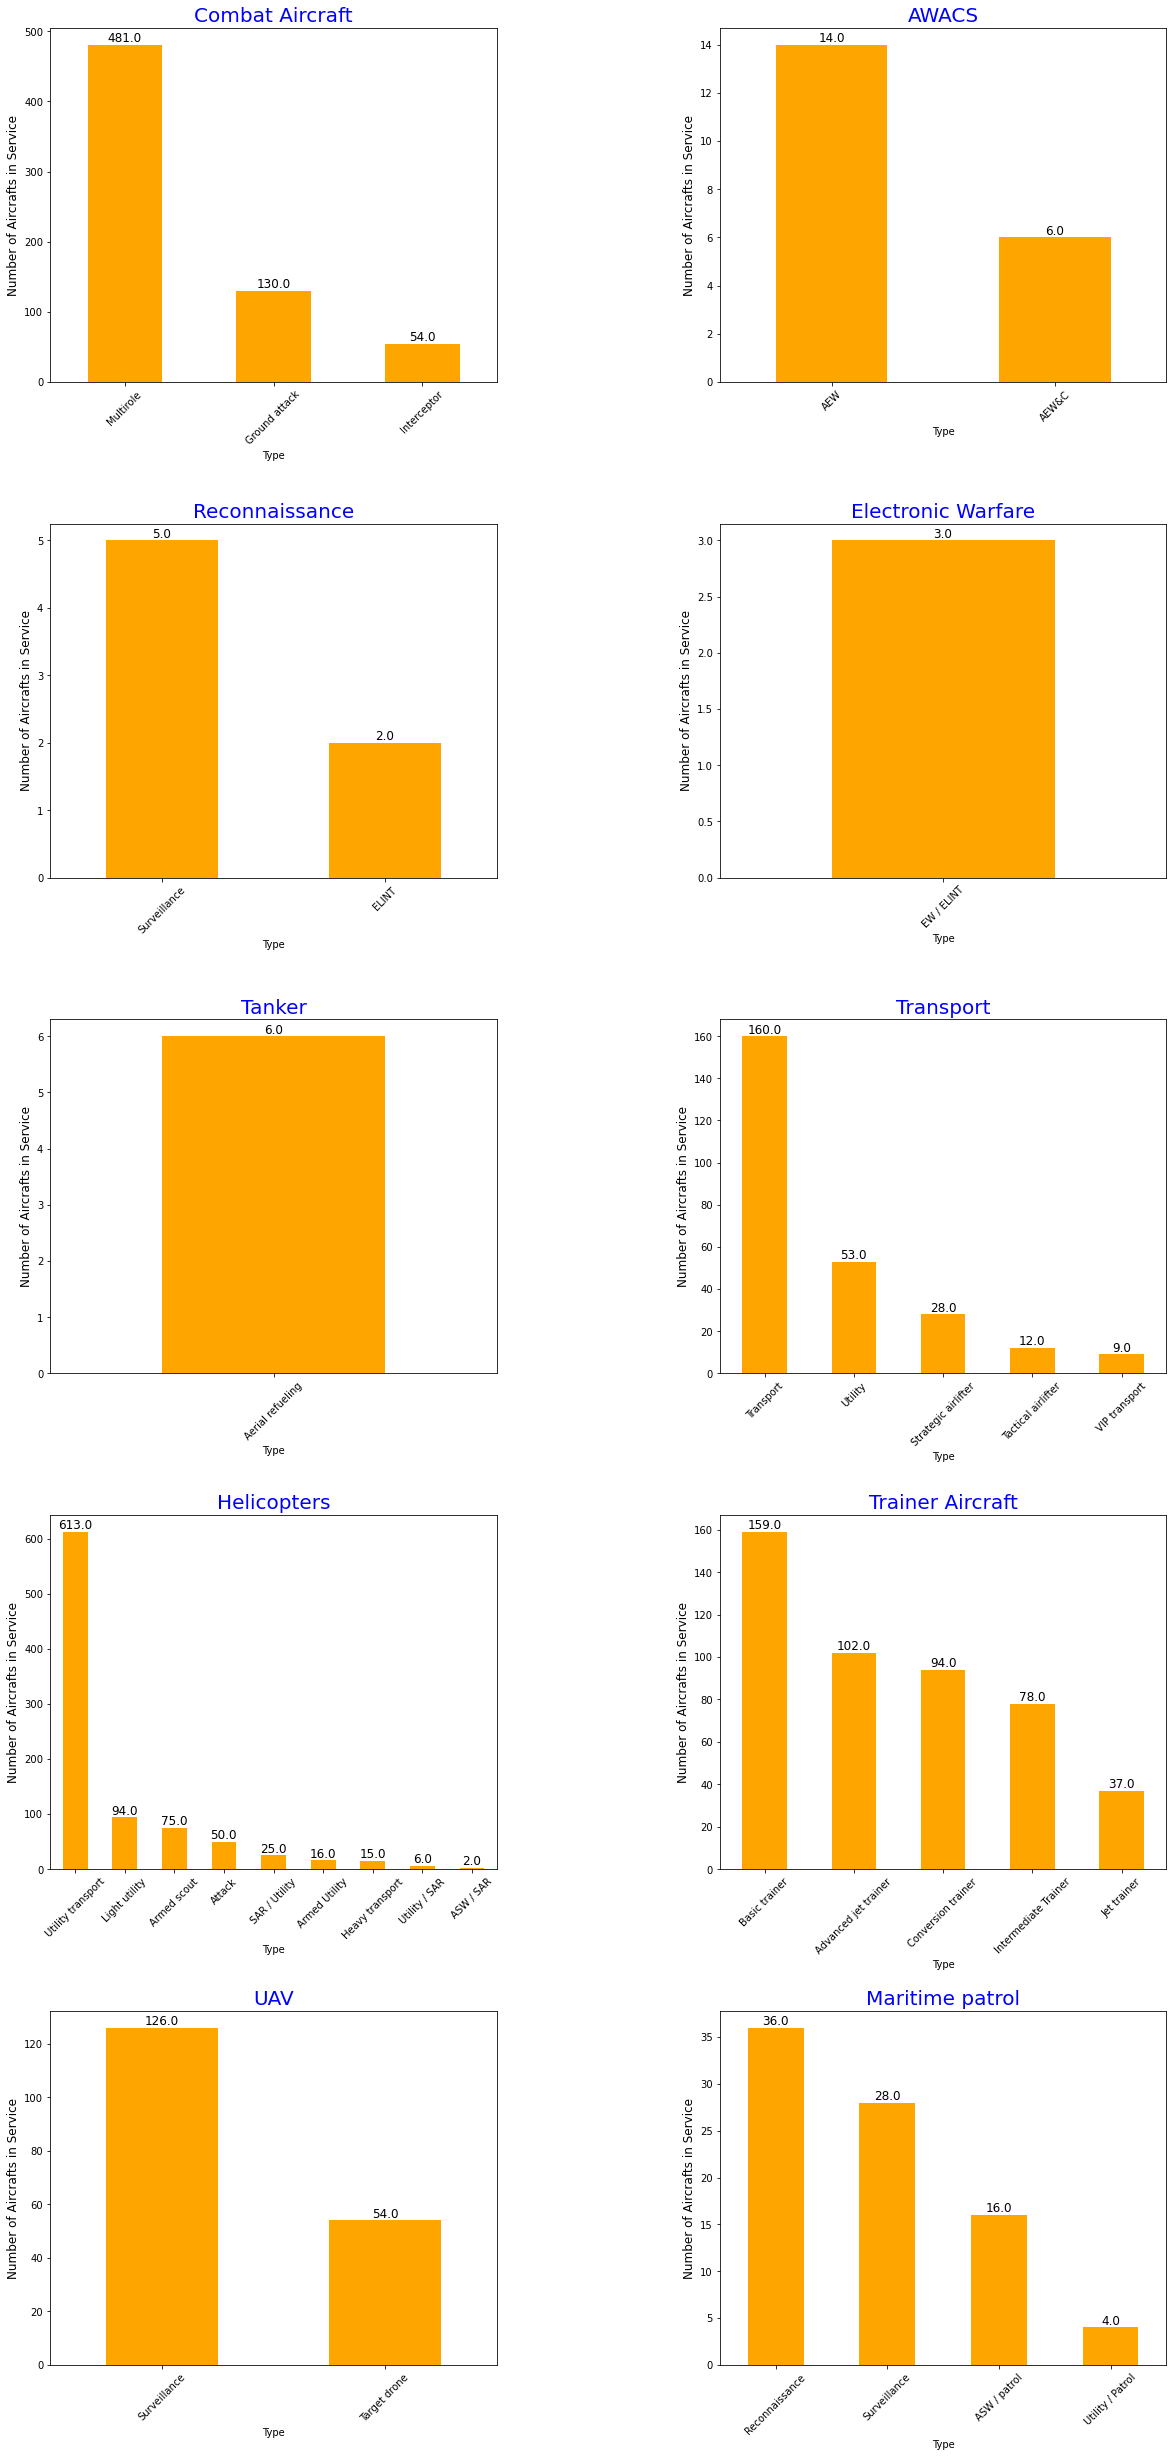

In [17]:
duty_list=df["Duty"].unique()

plt.figure(figsize=(20,60))
for i in range(0,10):
    plt.subplot(9,2,i+1) 
    plt.subplots_adjust(top = 1, bottom=0.0, hspace=0.4, wspace=0.5)
    t01=df[df["Duty"]==duty_list[i]]
    t01x=t01.groupby("Type")["In service"].sum().sort_values(ascending=False)
    t01x.plot(kind="bar",color='orange')
    plt.title(duty_list[i],fontsize=20,color="blue")
    for x in range(0,len(t01x)):
        plt.text(x,t01x[x],t01x[x],ha="center",va="bottom",size=12)
    plt.xticks(rotation=45)
    plt.ylabel("Number of Aircrafts in Service",size=12)